In [1]:
import synthgauge as sg
import pandas as pd

%matplotlib inline

In [3]:
real_data = pd.read_csv('data.csv')
synth_data = pd.read_csv('mst_data.csv')

display(real_data.head())
display(synth_data.head())

,Region,Residence.Type,Family.Composition,Population.Base,Sex,Age,Marital.Status,Student,Country.of.Birth,Health,Ethnic.Group,Religion,Economic.Activity,Occupation,Industry,Hours.worked.per.week,Approximated.Social.Grade
0,7,1,0,0,1,5,3,1,1,1,0,1,0,3,7,2,1
1,1,1,1,0,1,2,1,1,0,1,0,1,0,3,11,1,1
2,7,1,0,0,0,2,1,1,1,0,4,6,0,0,2,2,0
3,1,1,0,0,1,1,0,0,0,1,2,5,5,3,7,4,1
4,1,1,2,0,1,2,0,1,0,0,0,0,8,8,5,4,1


,Region,Residence.Type,Family.Composition,Population.Base,Sex,Age,Marital.Status,Student,Country.of.Birth,Health,Ethnic.Group,Religion,Economic.Activity,Occupation,Industry,Hours.worked.per.week,Approximated.Social.Grade
0,2,1,1,0,1,4,1,1,0,1,0,0,0,6,3,2,3
1,2,1,4,0,1,2,0,1,0,0,2,5,6,1,5,4,0
2,2,1,1,0,0,4,1,1,0,2,0,1,7,3,7,4,1
3,3,1,1,0,0,5,1,1,0,3,0,1,7,4,2,4,2
4,7,1,2,0,1,1,0,0,0,1,0,1,5,2,3,4,1


In [4]:
col_names = list(real_data)

# loop to change each column to category type
for col in col_names:
    real_data[col] = real_data[col].astype('category',copy=False)
    synth_data[col] = synth_data[col].astype('category',copy=False)

In [5]:
E = sg.Evaluator(real_data, synth_data)
E.describe_categorical()

,count,unique,most_frequent,freq
Age_real,100000,8,0,18734
Age_synth,100000,8,0,18785
Approximated.Social.Grade_real,100000,5,1,27871
Approximated.Social.Grade_synth,100000,5,1,27868
Country.of.Birth_real,100000,3,0,85205
Country.of.Birth_synth,100000,3,0,85200
Economic.Activity_real,100000,10,0,37963
Economic.Activity_synth,100000,10,0,37951
Ethnic.Group_real,100000,6,0,84880
Ethnic.Group_synth,100000,6,0,84887


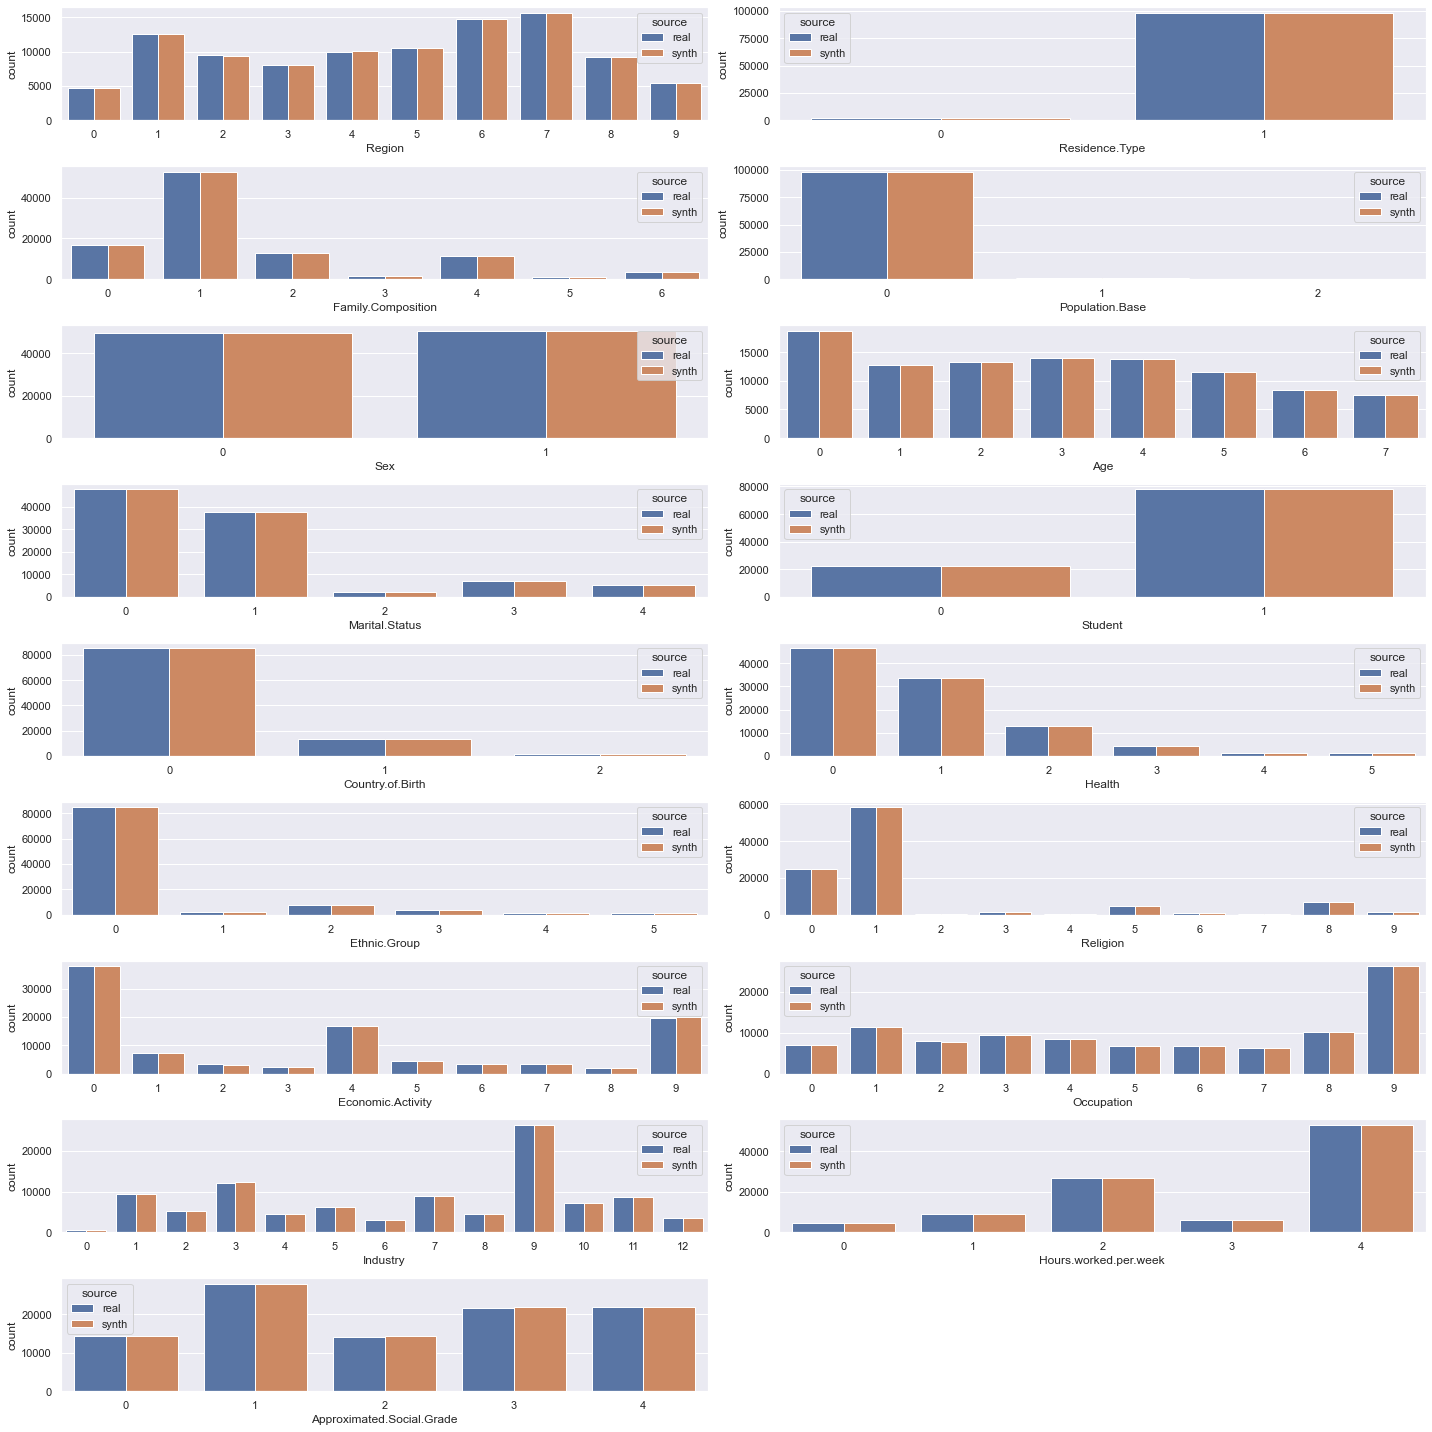

In [6]:
E.plot_histograms(figsize=(20,20), figcols = 2);

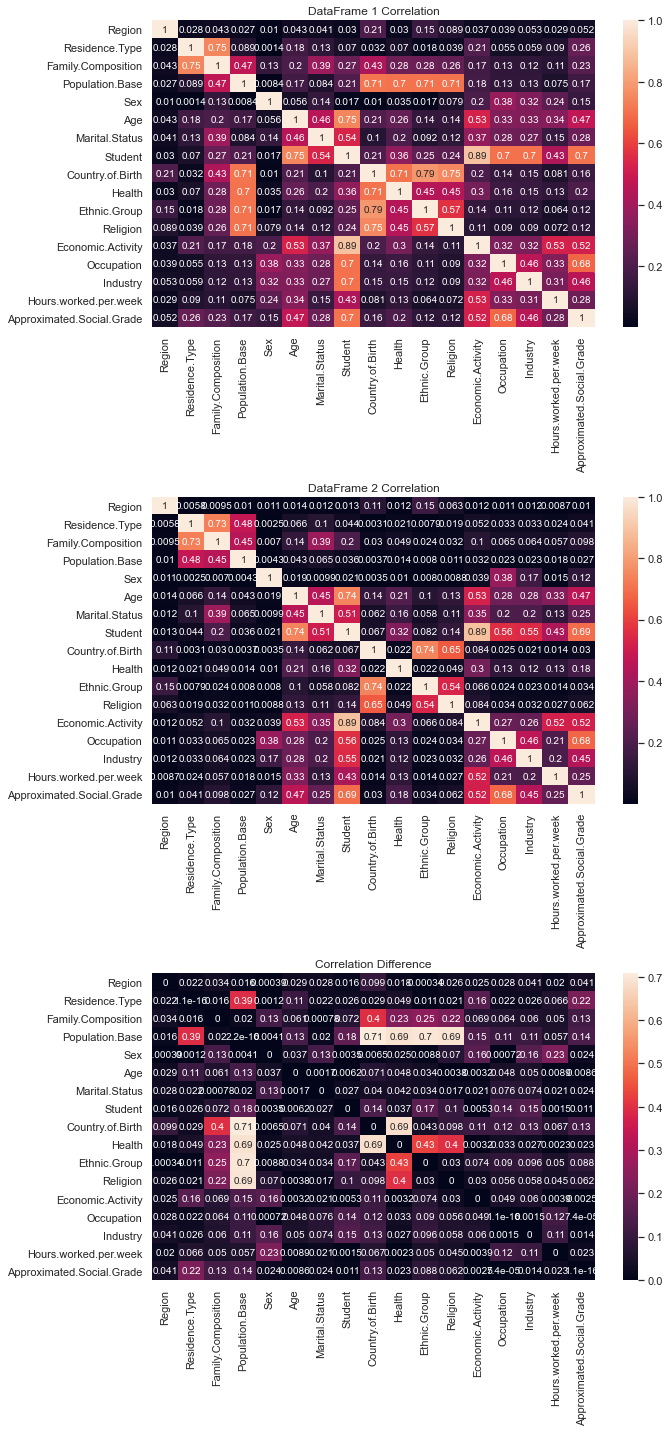

In [7]:
E.plot_correlation(feats=col_names, method='cramers_v', figsize=(10,20), annot=True, figcols = 1);

In [ ]:
E.plot_crosstab('Product','CardType', figsize=(12, 6), annot=True, fmt='d');

In [ ]:
#univariate distribution comparisons
for col in col_names:
    E.add_metric('jensen_shannon_distance','JS-distance: '+ col,feature=col, bins = None)

#correlations
E.add_metric('cramers_v_MSE')

#general utility
E.add_metric('propensity_metrics')

E.evaluate(as_df=True)

In [ ]:
synth_data_baseline = pd.read_csv('baseline_data.csv')
for col in col_names:
    synth_data_baseline[col] = synth_data_baseline[col].astype('category',copy=False)

E_baseline = sg.Evaluator(real_data, synth_data_baseline)

In [ ]:
E_baseline.copy_metrics(E)
E_baseline.evaluate(as_df=True)